In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("marketing_data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
print('min, max, average = ', df['BALANCE'].min(),",", df['BALANCE'].max(), "," ,df['BALANCE'].mean())

min, max, average =  0.0 , 19043.13856 , 1564.4748276781038


In [7]:
df['ONEOFF_PURCHASES'].max()

40761.25

In [8]:
df['CASH_ADVANCE'].max()

47137.211760000006

In [9]:
df[df['ONEOFF_PURCHASES']== 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [10]:
df[df['CASH_ADVANCE'] == 47137.211760000006 ]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


<AxesSubplot:>

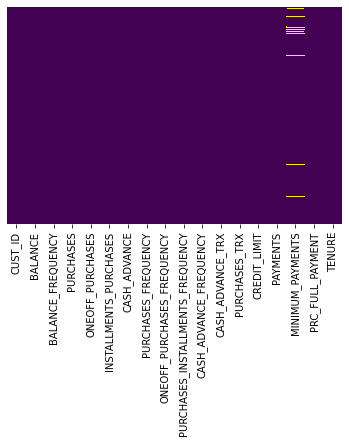

In [11]:
sns.heatmap(df.isnull(), cbar = False, yticklabels = False, cmap = 'viridis')

In [12]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS']= df['MINIMUM_PAYMENTS'].mean()

In [13]:
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

In [14]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
df.drop('CUST_ID', axis=1, inplace = True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [16]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [17]:
n = len(df.columns)

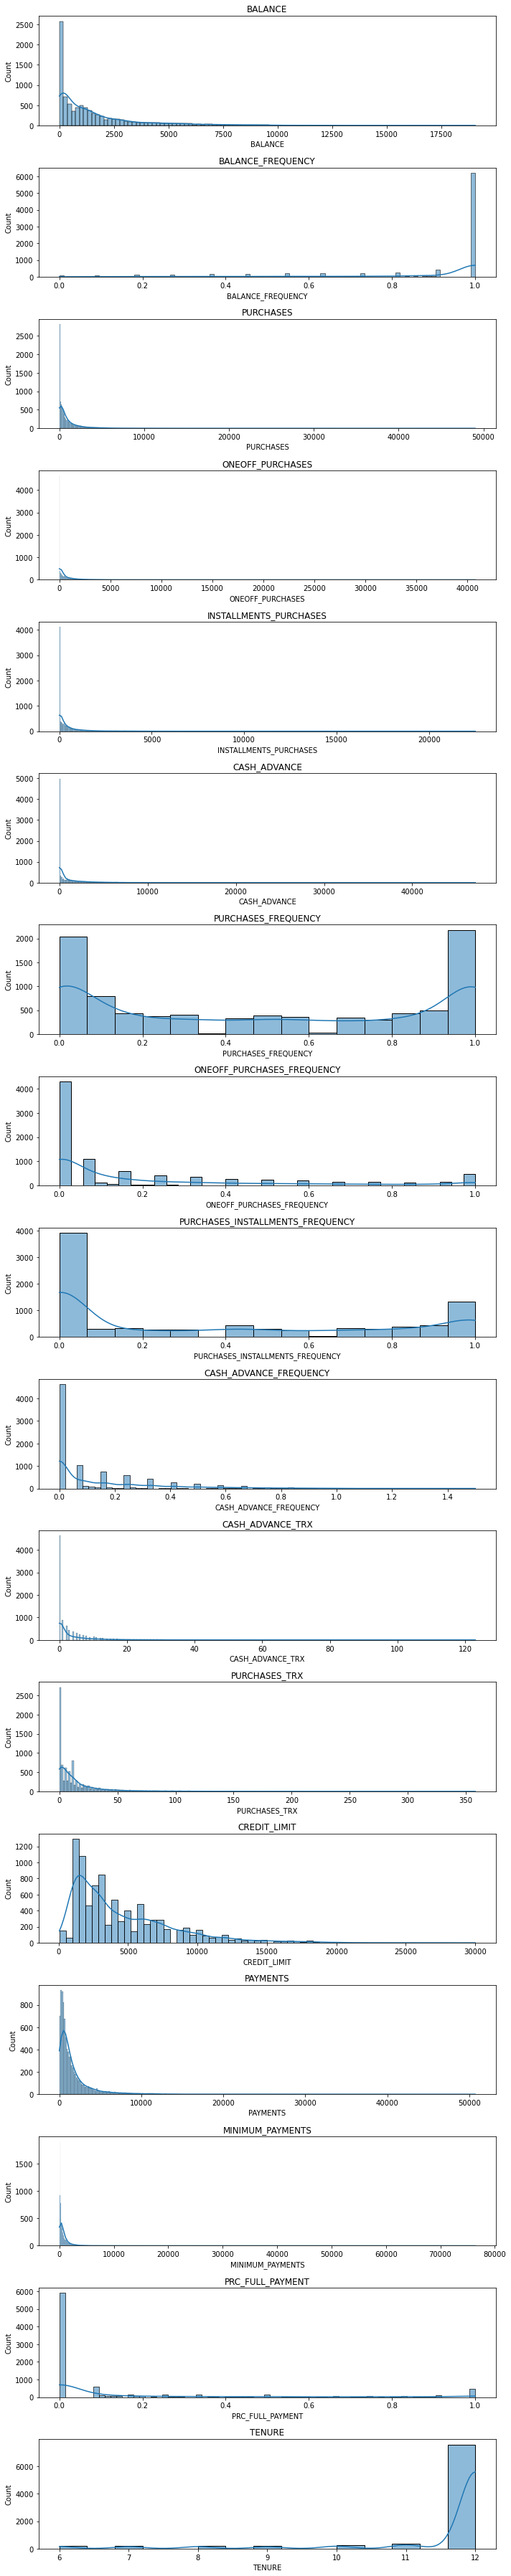

In [18]:
plt.figure(figsize = (10,50))

for i in range(n):
    plt.subplot(17, 1, i+1)
    sns.histplot(x= df[df.columns[i]], kde = True)
    plt.title(df.columns[i])
    
plt.tight_layout()

In [19]:
# now apply Kmenas to find optimum no of values pf clusters

In [20]:
scaler =StandardScaler()
scaled_data = scaler.fit_transform(df)

<AxesSubplot:>

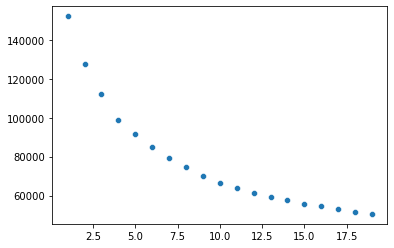

In [21]:
# apply the Elbow Method
clusters = []
for i in range(1,20):
    kmeans = KMeans(n_clusters =i)
    kmeans.fit(scaled_data)
    kmeans.inertia_
    clusters.append(kmeans.inertia_)
    
sns.scatterplot(x= range(1,20), y= clusters)

In [125]:
# the optimal value of k from elbow method is 9
##scale = StandardScaler()
#df_feat = scale.fit_transform(df)

In [41]:
kmeans = KMeans(9)
kmeans.fit(df)
labels = kmeans.labels_

In [42]:
kmeans.cluster_centers_.shape

(9, 17)

In [43]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,761.649044,0.848897,460.460792,217.575014,243.106761,420.148312,0.443508,0.120189,0.342758,0.105850,2.133360,8.842927,2013.330068,801.038766,542.026755,0.139830,11.350223
1,1552.091057,0.877024,1547.885842,973.467683,574.515188,415.951059,0.646473,0.395450,0.433071,0.064060,1.178218,21.075248,11985.049505,2025.206321,504.100925,0.259928,11.752475
2,835.191010,0.872665,1313.168270,759.102661,554.557035,184.133616,0.641928,0.337572,0.453944,0.046286,0.854415,20.366348,6020.095951,1478.410158,362.038630,0.240154,11.827566
3,2624.758449,0.970406,7110.876799,4789.712662,2323.322410,573.415450,0.915113,0.712748,0.709750,0.074068,2.050360,80.014388,8229.136691,6925.442086,1343.525295,0.319229,11.953237
4,5058.401508,0.867928,1532.094902,898.135392,634.175196,11090.488593,0.363679,0.200864,0.290319,0.492117,20.941176,19.882353,10783.823529,16350.892279,2087.683165,0.158185,11.715686
5,7986.373931,0.989053,1148.432500,671.989942,476.637180,4242.866068,0.409895,0.207853,0.315030,0.372426,10.697674,18.197674,11854.796512,3016.937430,2721.937254,0.002663,11.703488
6,3601.920831,0.952140,495.171797,276.821293,218.383508,3195.394627,0.310585,0.135187,0.211571,0.355977,9.500951,8.591255,5849.402293,2605.042837,1512.715735,0.032715,11.476236
7,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
8,4250.150569,0.984849,918.267222,146.178056,772.089167,976.903069,0.499369,0.044823,0.468645,0.084596,2.833333,20.166667,4476.388889,1357.092339,27995.061876,0.000000,11.916667


In [44]:
# now do the inverse transform to get the actual values of cluster centers

In [45]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers =pd.DataFrame(cluster_centers ,  columns  =  [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.586873e+06,1.078367,9.847848e+05,3.617224e+05,2.202495e+05,8.820495e+05,0.668352,0.238312,0.500658,0.156326,17.807444,234.511919,7.329813e+06,2.320662e+06,1.264035e+06,0.194612,26.706822
1,3.232111e+06,1.085030,3.308085e+06,1.616349e+06,5.199380e+05,8.732477e+05,0.749811,0.320428,0.536551,0.147963,11.289298,538.561672,4.361101e+07,5.864507e+06,1.175650e+06,0.229739,27.245139
2,1.739944e+06,1.083997,2.806607e+06,1.260547e+06,5.018901e+05,3.871157e+05,0.747987,0.303162,0.544846,0.144406,9.079583,520.941092,2.190807e+07,4.281586e+06,8.445800e+05,0.223956,27.345629
3,5.464778e+06,1.107151,1.519350e+07,7.950534e+06,2.101363e+06,1.203458e+06,0.857630,0.415084,0.646510,0.149966,17.241026,2003.568306,2.994546e+07,2.005021e+07,3.131893e+06,0.247084,27.513810
4,1.053020e+07,1.082875,3.274348e+06,1.491313e+06,5.738878e+05,2.325825e+07,0.636312,0.262379,0.479818,0.233622,146.156974,508.910774,3.924046e+07,4.733596e+07,4.866122e+06,0.199981,27.195906
5,1.662453e+07,1.111568,2.454647e+06,1.115958e+06,4.314282e+05,8.898467e+06,0.654861,0.264464,0.489638,0.209670,76.252597,467.035966,4.313709e+07,8.735471e+06,6.344224e+06,0.154493,27.179582
6,7.498659e+06,1.102824,1.058945e+06,4.600591e+05,1.978926e+05,6.701871e+06,0.615003,0.242786,0.448521,0.206379,68.085836,228.256297,2.128701e+07,7.543077e+06,3.526184e+06,0.163283,26.875460
7,1.134154e+07,1.103768,5.964515e+07,3.710418e+07,5.030277e+06,2.035346e+06,0.853600,0.456029,0.646091,0.143120,15.413822,3201.714695,5.837723e+07,8.036885e+07,7.797919e+06,0.304436,27.460020
8,8.847894e+06,1.110572,1.962895e+06,2.432181e+05,6.986017e+05,2.049590e+06,0.690771,0.215829,0.550689,0.152073,22.584246,515.977750,1.629143e+07,3.930382e+06,6.524217e+07,0.153715,27.464869


In [46]:
y_kmeans = kmeans.fit_predict(scaled_data)
y_kmeans

array([0, 1, 6, ..., 4, 4, 4])

In [47]:
cluster_centers =pd.concat([df, pd.DataFrame({'cluster' : labels })], axis=1)

In [48]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [49]:
# now plot the all the clusters

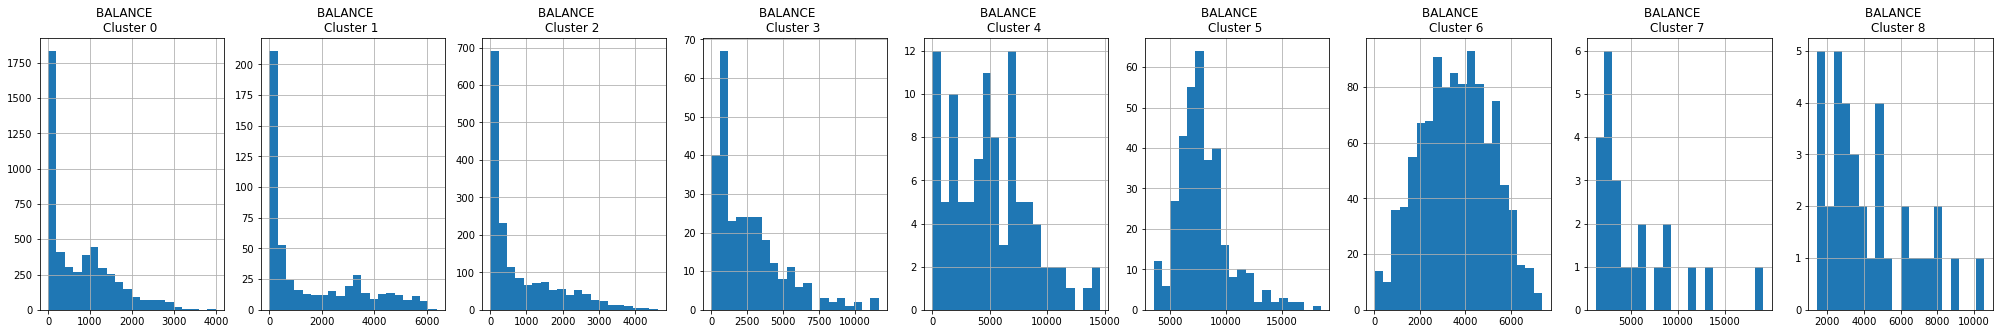

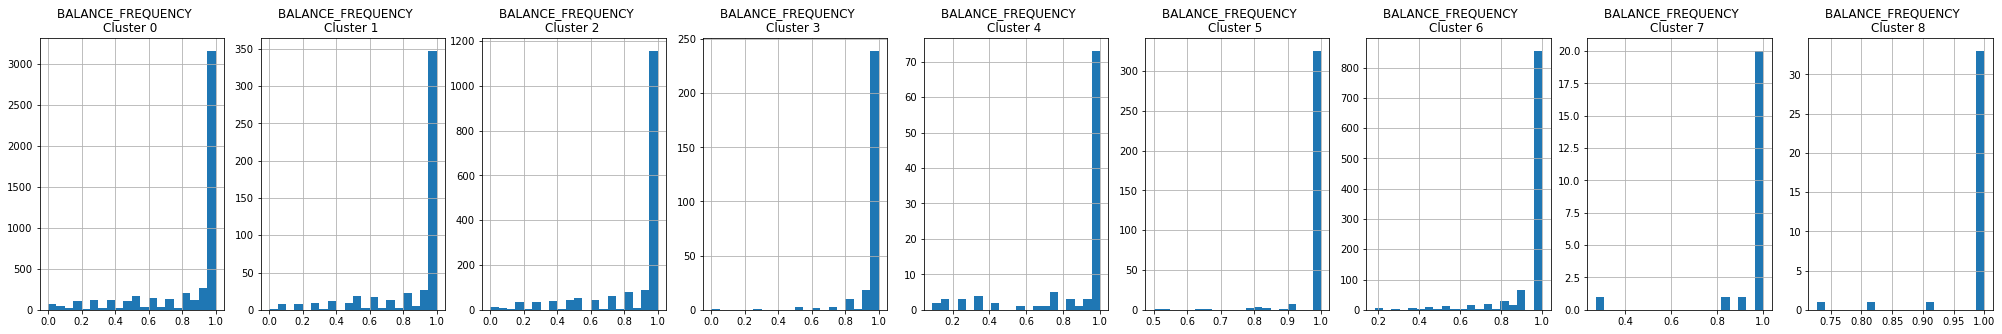

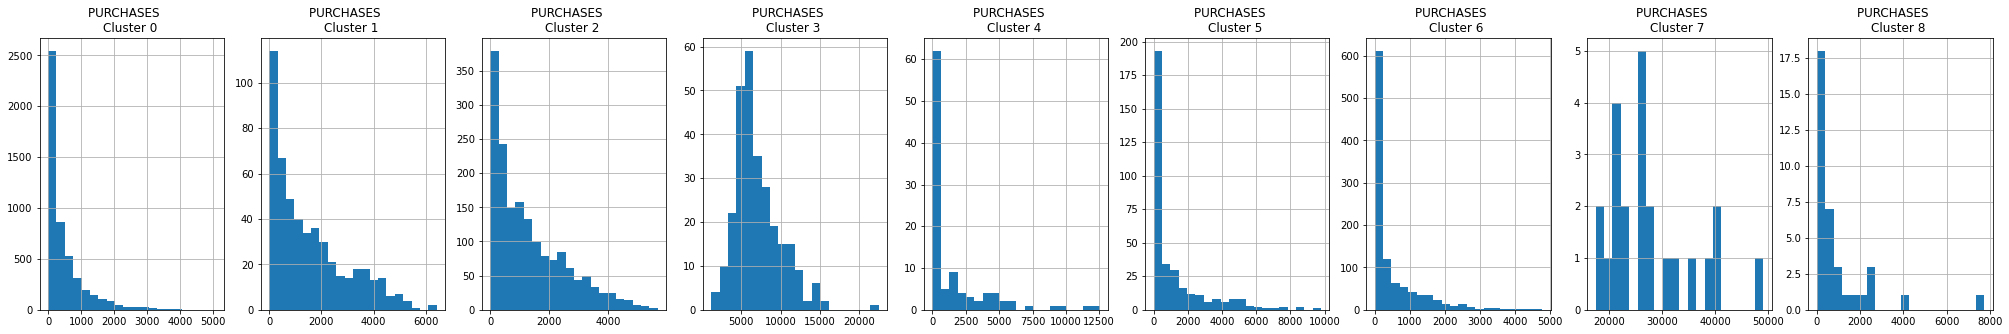

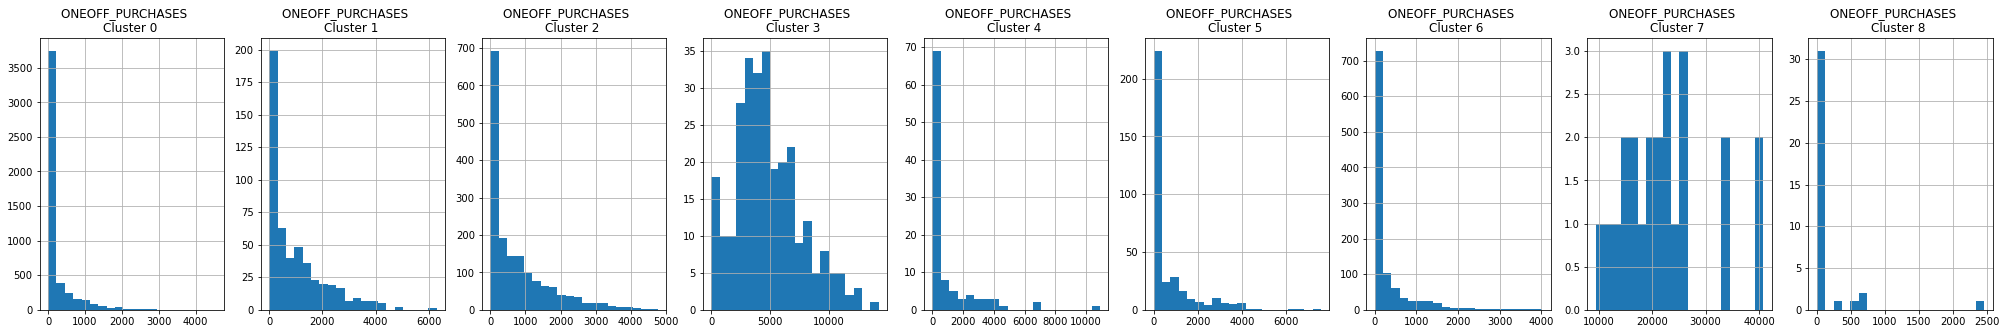

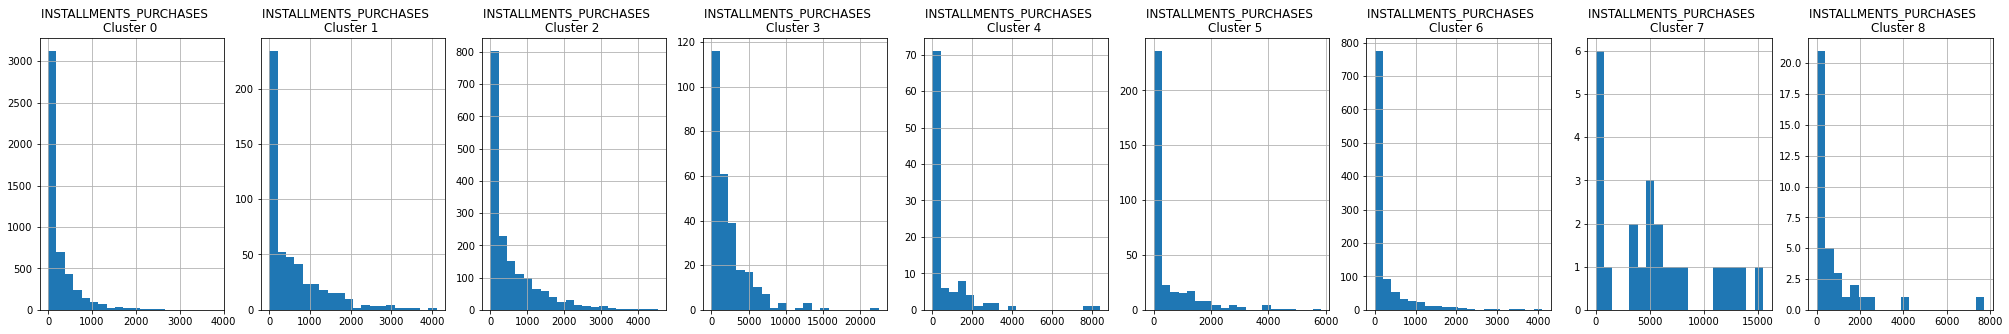

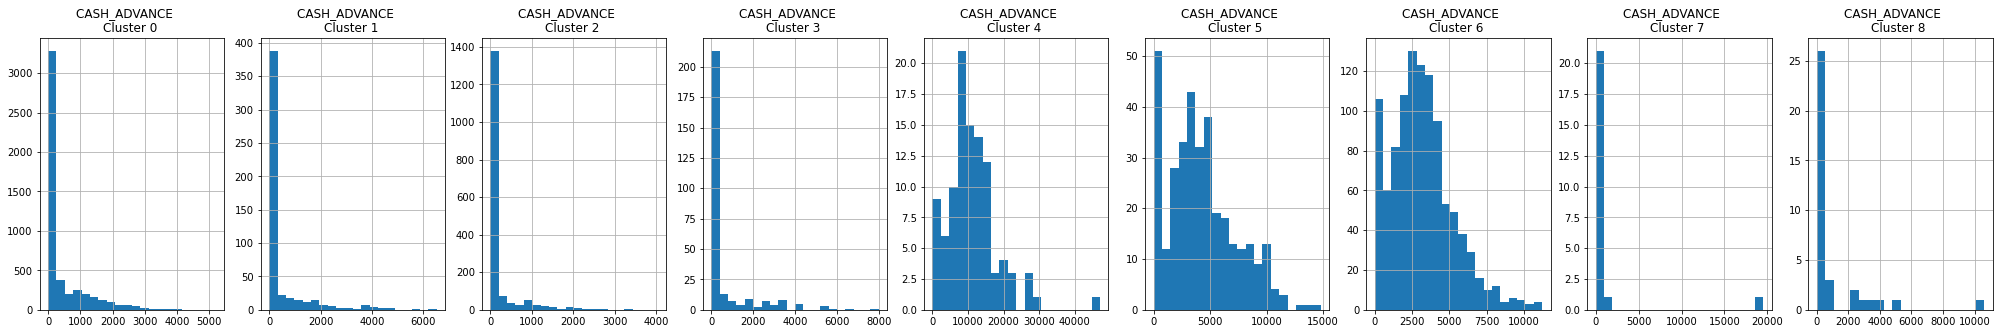

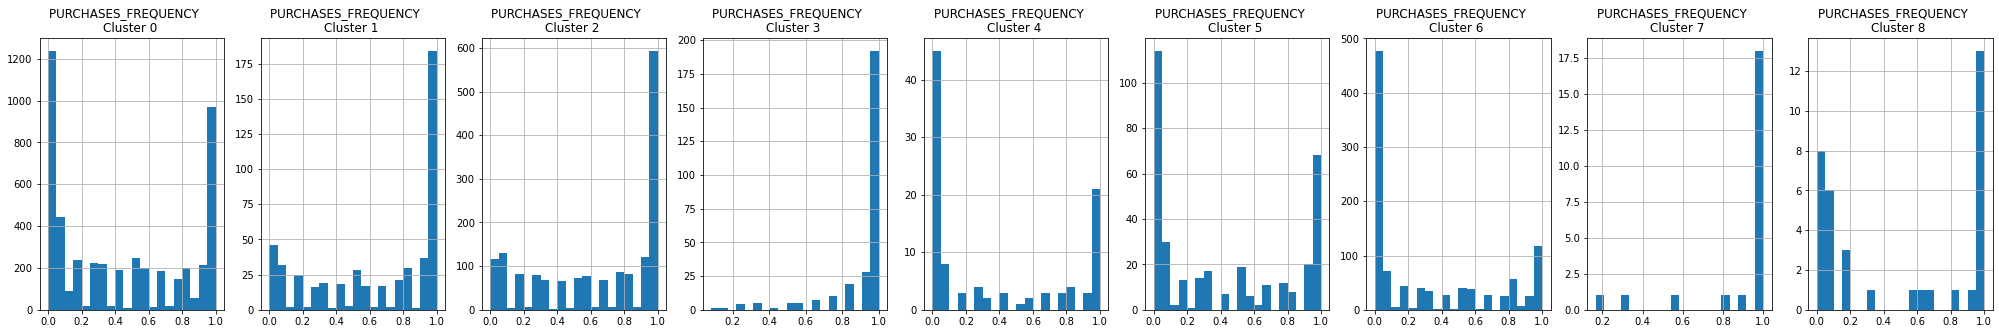

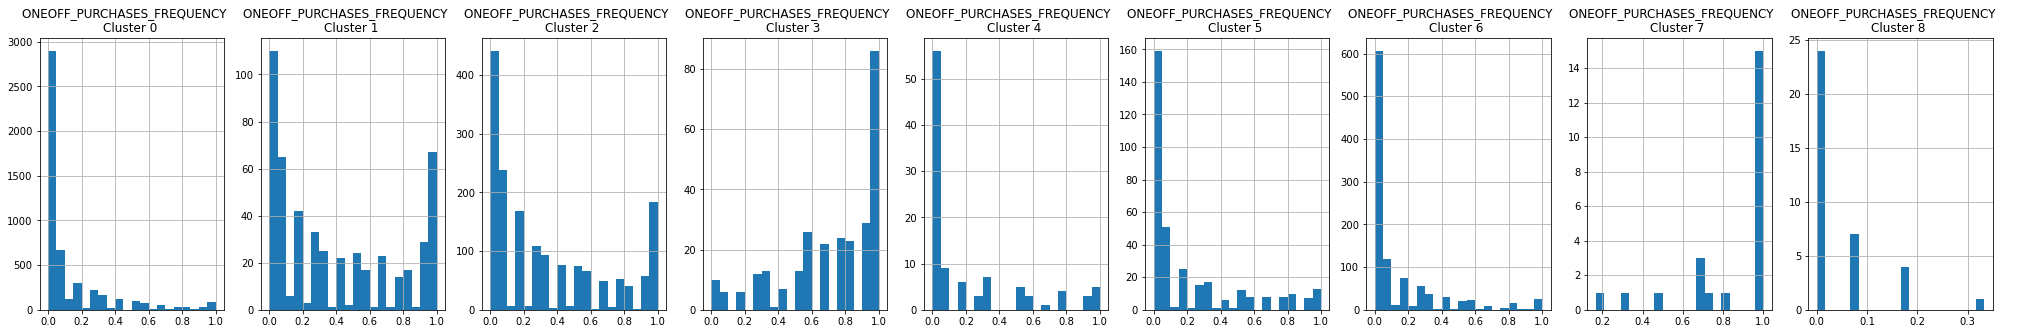

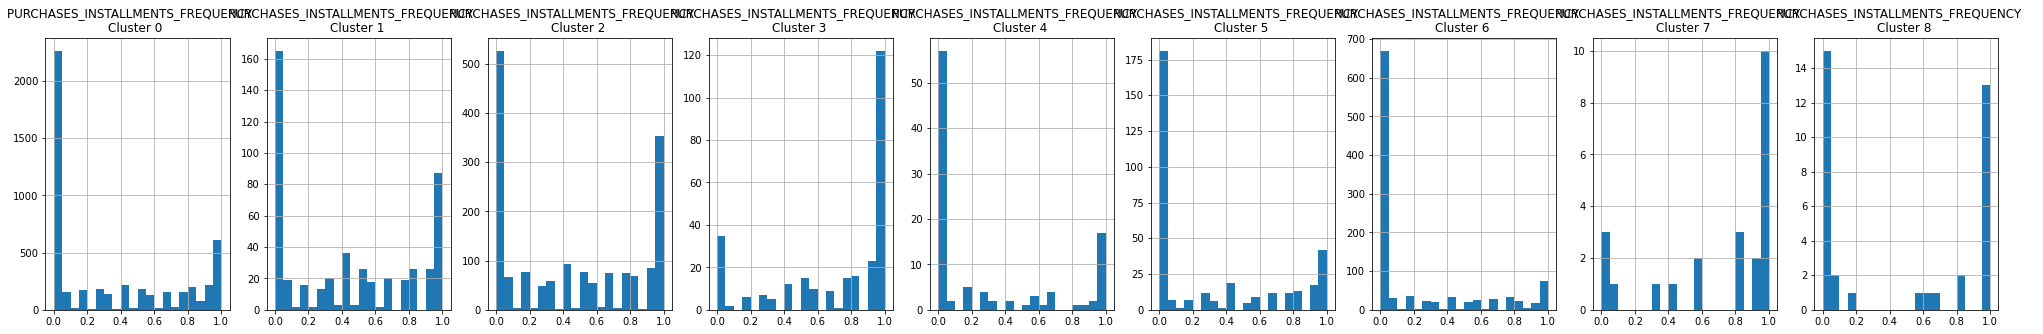

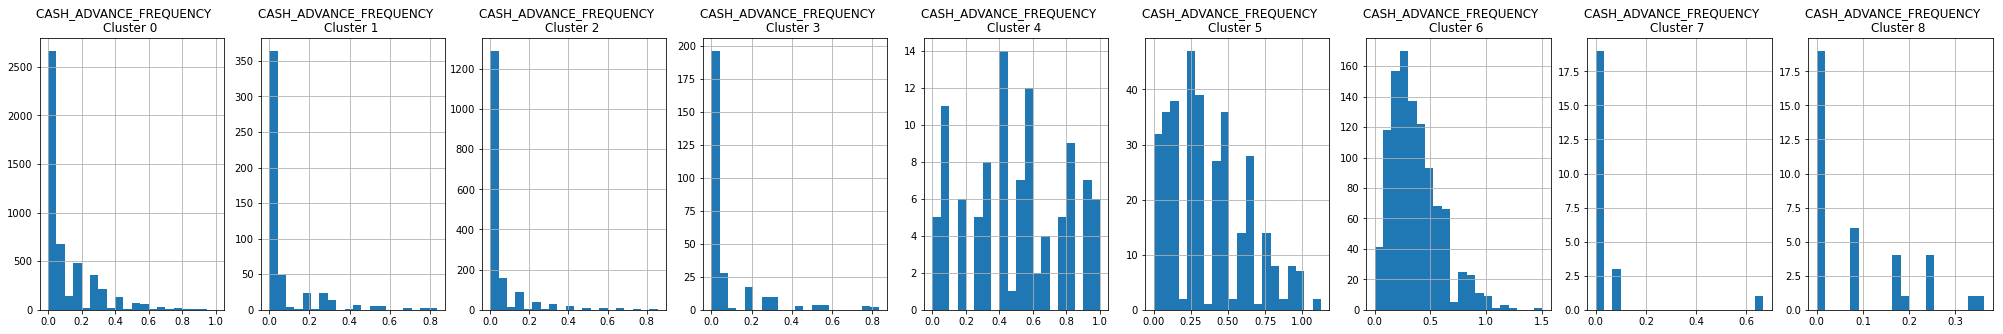

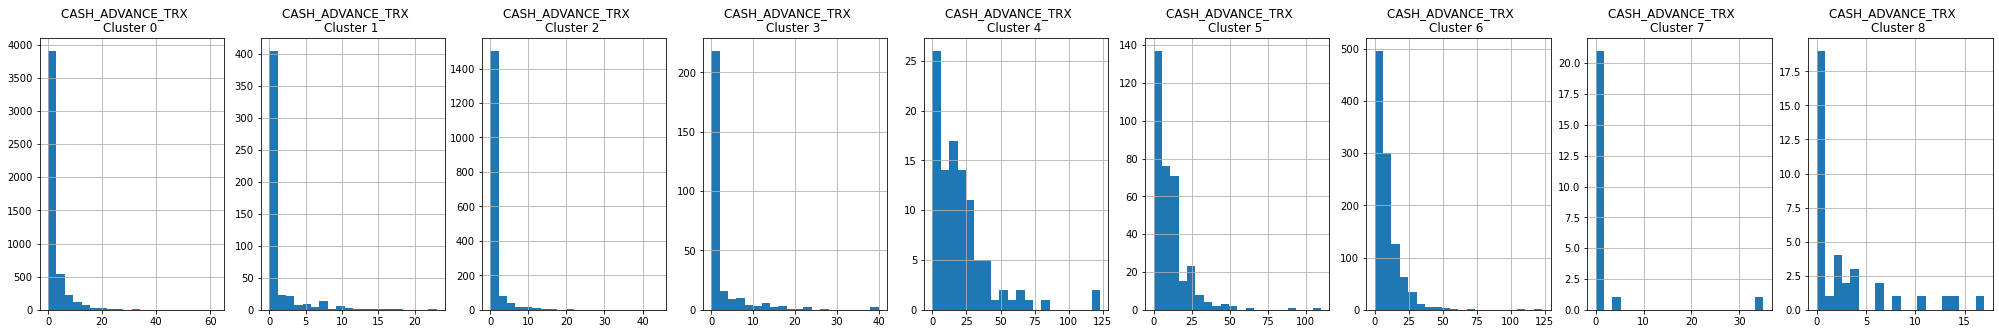

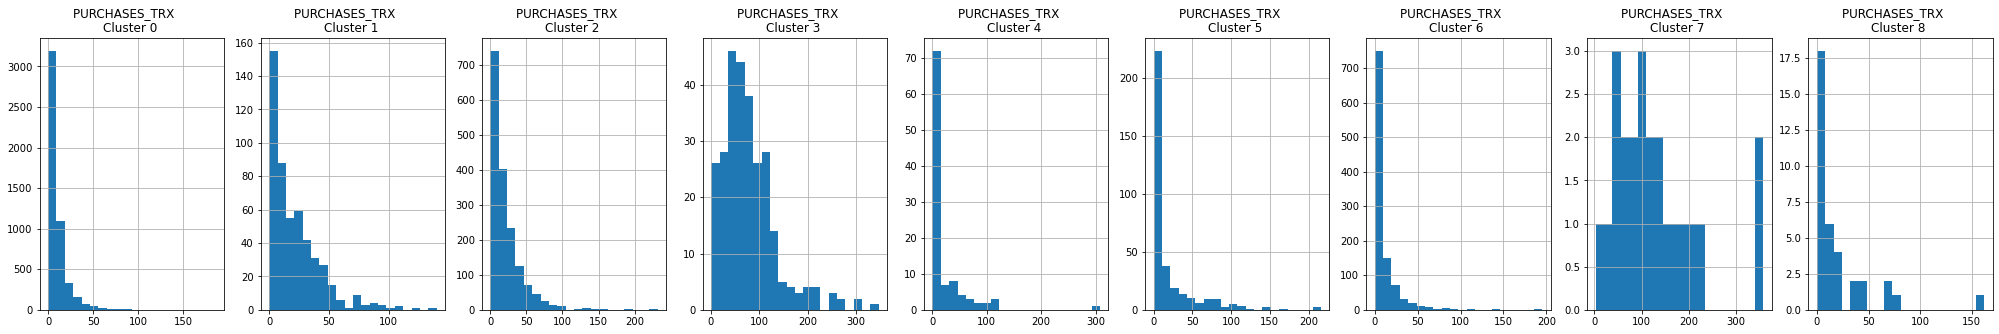

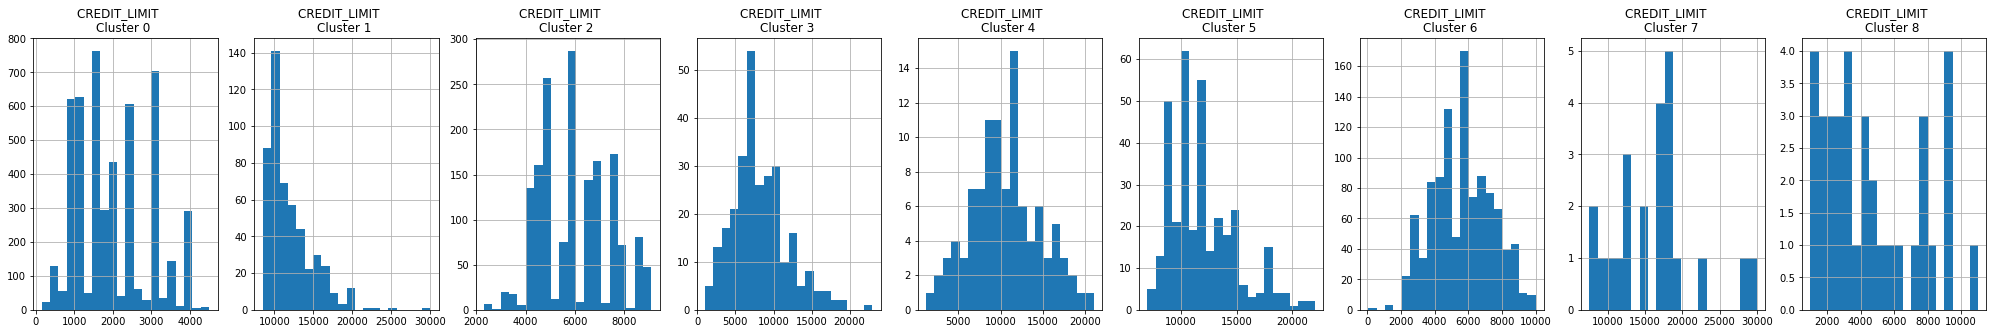

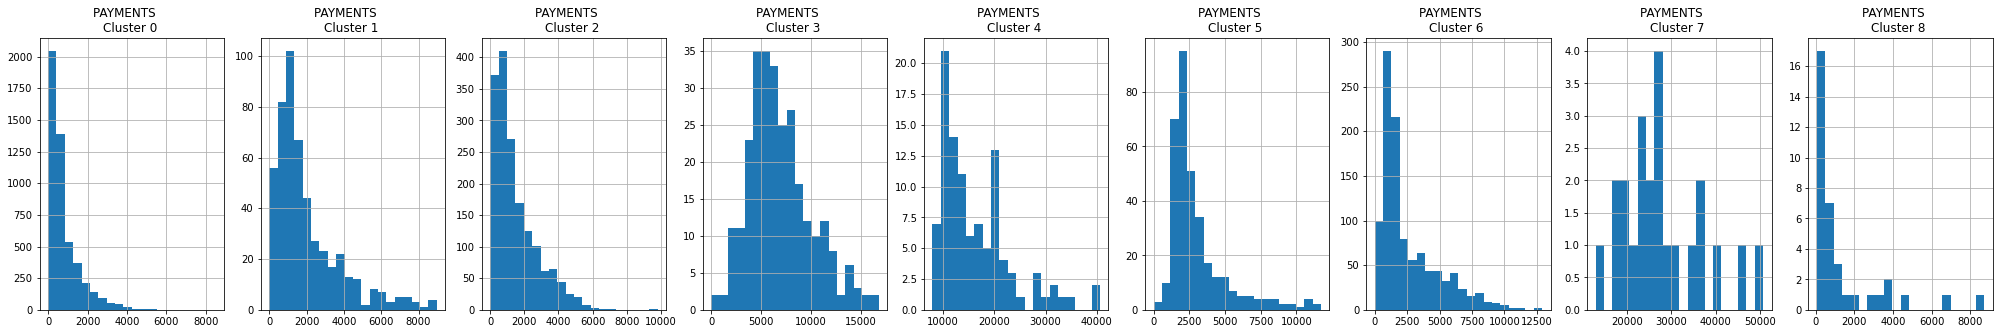

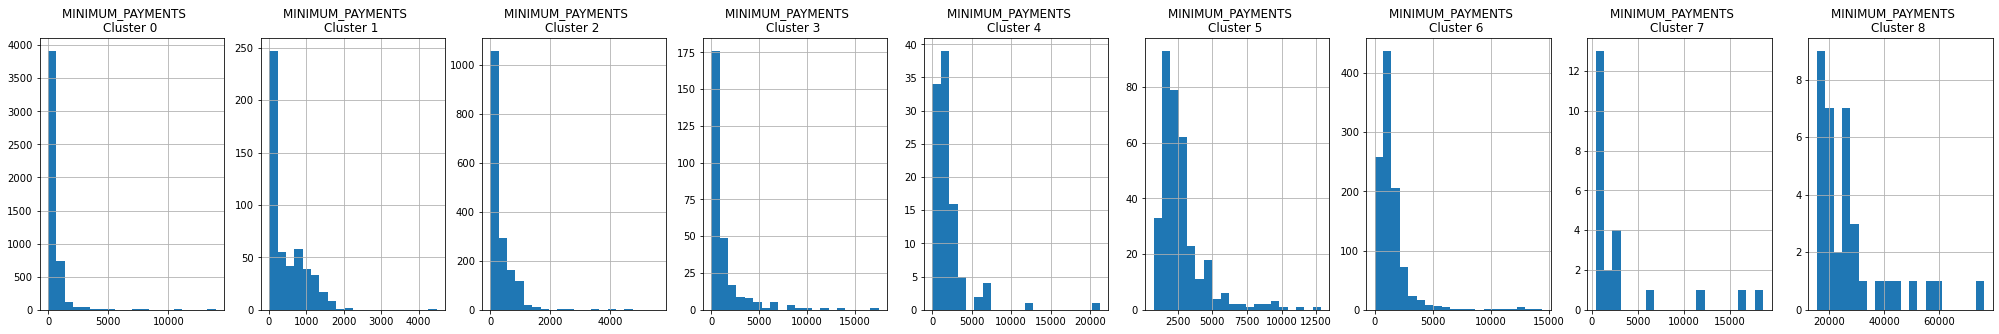

In [ ]:
for i in df.columns:
    plt.figure(figsize = (35, 5))
    for j in range(9):
        plt.subplot(1,9, j+1)
        cluster = cluster_centers[cluster_centers['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster {} '.format(i,j))
plt.show()

In [153]:
# principal component analysis

In [ ]:
pca = PCA(n_components =2)
principal_component =pca.fit_transform(scaled_data)
principal_component

In [ ]:
pca_df =pd.DataFrame(data = principal_component, columns =['pca1', 'pca2'])
pca_df

In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)

In [ ]:
pca_df

In [ ]:
plt.figure(figsize=(10,12))

sns.scatterplot(x ='pca1', y='pca2', hue = 'cluster', data =pca_df, palette ='coolwarm' )